<a href="https://colab.research.google.com/github/rdcool92/Netflix-Movies-and-Tv-shows-clustering/blob/main/Netflix_Movies_And_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  <font size="+2" color='#947318'> <b>1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm


##  <font size="+2" color='#947318'> <b>2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_path = "/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df = pd.read_csv(working_path)


##  <font size="+2" color='#947318'> <b>3. Basic Data Exploration 

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.5 MB


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

###  Defining *DataInfoAll*

In [ ]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [ ]:
DataInfoAll(df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


###  Checking duplicate values

In [ ]:
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* No duplicate values present in this dataset.

##  <font size="+2" color='#154085'> <b>4. Data Cleaning & Data Visualization

###  Checking NaN values

In [ ]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values


* Ploting the null values present in the dataset


In [ ]:
plot_nan = df.isna()
plot_nan.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

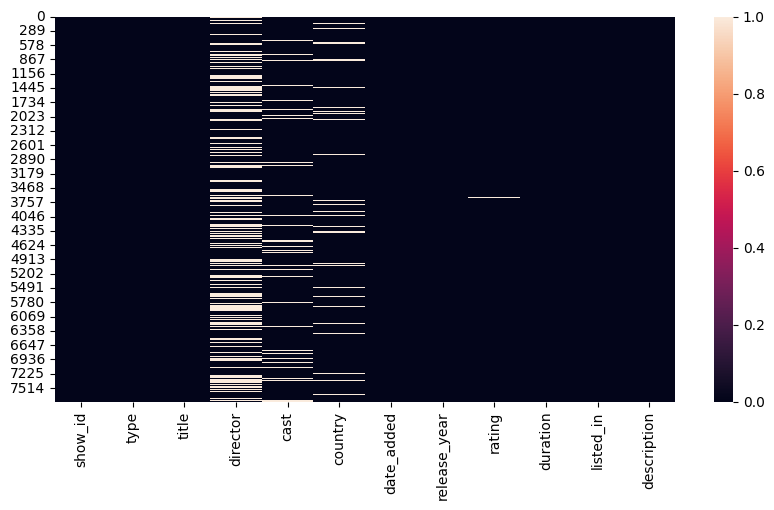

In [ ]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

* Using barplot to check the no of NaN values present in this dataset

<BarContainer object of 12 artists>

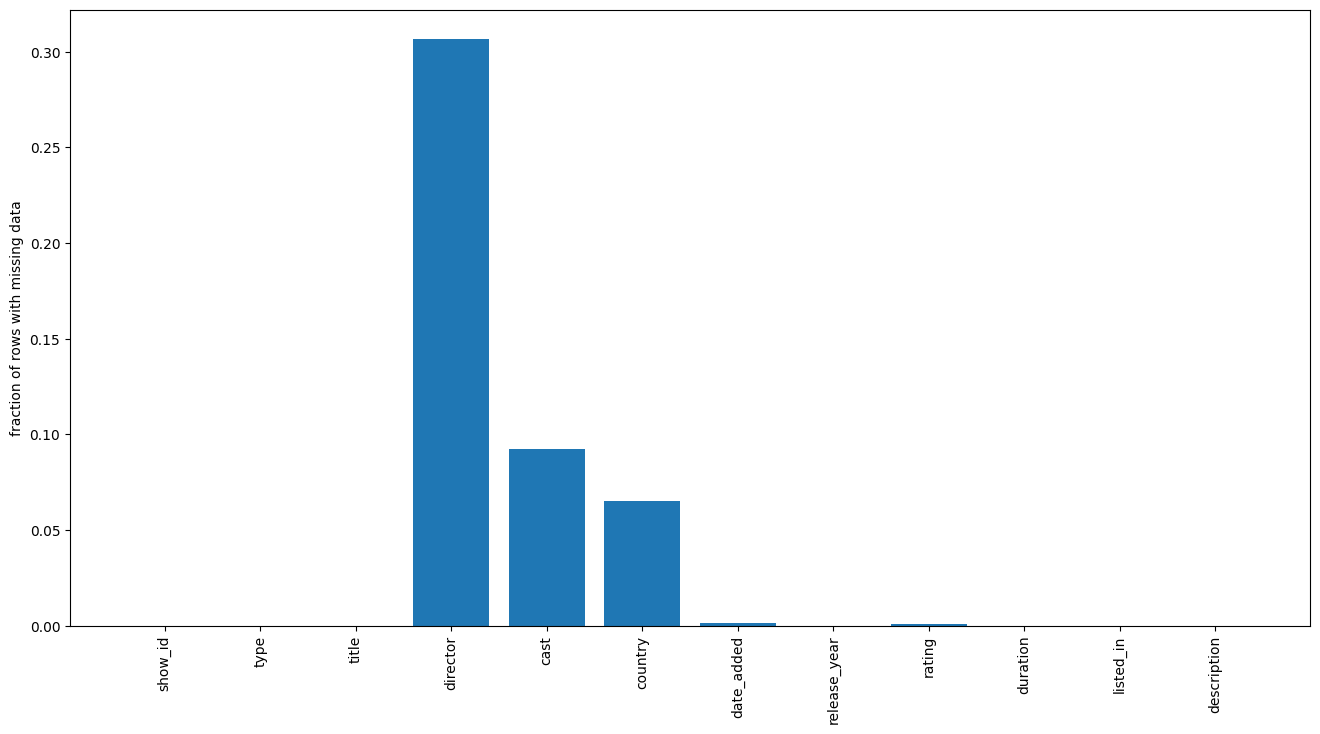

In [ ]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

director and cast contains large number of null values so we will drop it


###  Dropping irrelevent features 

In [ ]:
df.drop(['director','cast'],axis=1, inplace=True)

###  Looking NaN values on data_added 

In [ ]:
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [ ]:
data_added_NaN.shape

(10, 10)

* There are only 10 observations which are containing NaN values in *data_added* column

In [ ]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)
